In [ ]:
!pip install cython pyyaml==5.1

!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

     |████████████████████████████████| 274 kB 7.5 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=816fedccdaac34be7bc23616826b9d91780a3906973f97744cc196003f4d1e88
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2 MB 5.6 MB/s 
     |████████████████████████████████| 50 kB 2.6 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=e118663bc6dc856929252d599e29cf351dd16ecfd7e57b6b0e700ac291a8ae1e
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
Successfully built fvcore


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# change pytorch version to match it with the version of detectron
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 703.8 MB 23 kB/s 
     |████████████████████████████████| 6.6 MB 34.6 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.5.0+cu101 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.5.0+cu101 which is incompatible.


In [ ]:
# Setting up detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [ ]:
%%time
!rm -r frames/*
!mkdir frames/

video = "/content/drive/MyDrive/Colab Notebooks/Social Distancing/input2.mp4"

cap = cv2.VideoCapture(video)
cnt=0

if (cap.isOpened()== False): 
  print("Error opening video stream or file")

ret,first_frame = cap.read()

while(cap.isOpened()):
    
  ret, frame = cap.read()
     
  if ret == True:
     
    cv2.imwrite('frames/'+str(cnt)+'.png', frame)
    cnt=cnt+1
    if(cnt==750):
      break

  else: 
    break

mkdir: cannot create directory ‘frames/’: File exists
CPU times: user 40.3 s, sys: 1.46 s, total: 41.8 s
Wall time: 38 s


In [ ]:
#checking if the video read was in an appropriate format
FPS=cap.get(cv2.CAP_PROP_FPS)
print(FPS)

29.97002997002997


In [ ]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  # threshold value for the model

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_f97cb7.pkl: 136MB [00:03, 37.6MB/s]                           


In [ ]:
img = cv2.imread("frames/30.png")

outputs = predictor(img)

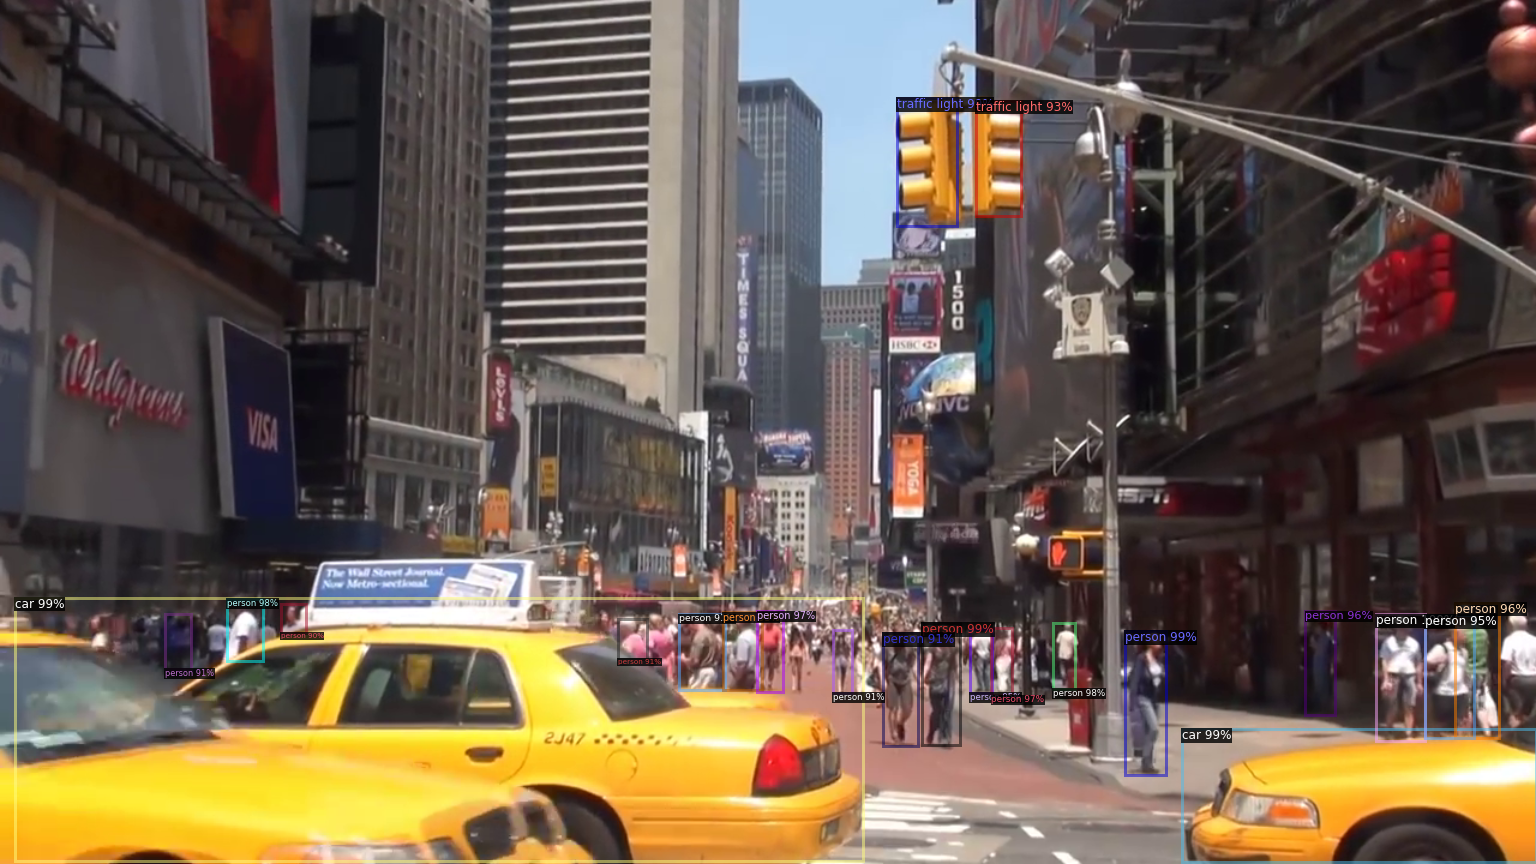

In [ ]:
# To draw the predictions of the image, we use visualiser
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
classes=outputs['instances'].pred_classes.cpu().numpy()
print(classes)

[0 9 0 2 2 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0]


In [ ]:
bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
print(bbox)

[[1146.2611    512.2758   1187.7971    617.7684  ]
 [ 747.3307     82.67496   797.83997   189.11935 ]
 [ 937.23694   526.2587    971.63885   645.8424  ]
 [ 984.75336   607.6696   1280.        718.44836 ]
 [  12.5531    498.3645    718.7951    717.47064 ]
 [ 768.3862    519.2978    800.1555    621.3696  ]
 [ 877.4672    519.22394   895.92303   574.4106  ]
 [ 189.28871   499.44894   219.50316   550.82275 ]
 [ 631.106     509.8092    652.7722    576.88184 ]
 [ 826.043     523.5921    843.4735    579.77155 ]
 [1212.1376    502.54147  1248.7488    615.1996  ]
 [1087.8649    509.78284  1112.8042    595.80927 ]
 [1187.4952    512.8999   1227.9908    614.74536 ]
 [ 808.03564   524.6775    826.5949    577.5759  ]
 [ 813.0972     84.648766  850.4965    180.34317 ]
 [ 602.3655    510.70453   634.713     574.8568  ]
 [ 137.44678   511.65567   158.9456    557.655   ]
 [ 514.91675   516.5239    539.39056   549.3772  ]
 [ 735.48114   527.60895   765.3546    621.5109  ]
 [ 565.9272    512.3443    604.

In [ ]:
# to identity people only and nothing else
ind = np.where(classes==0)[0]

person=bbox[ind]

num= len(person)

In [ ]:
x1,y1,x2,y2 = person[0]
print(x1,y1,x2,y2)

1146.2611 512.2758 1187.7971 617.7684


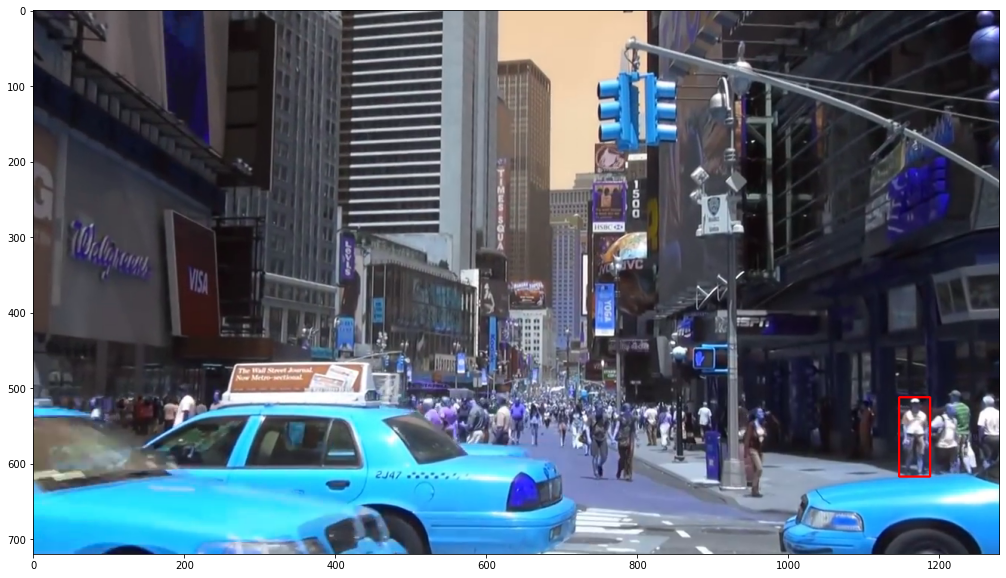

In [ ]:
img = cv2.imread('frames/30.png')
_ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

plt.figure(figsize=(20,10))
plt.imshow(img)

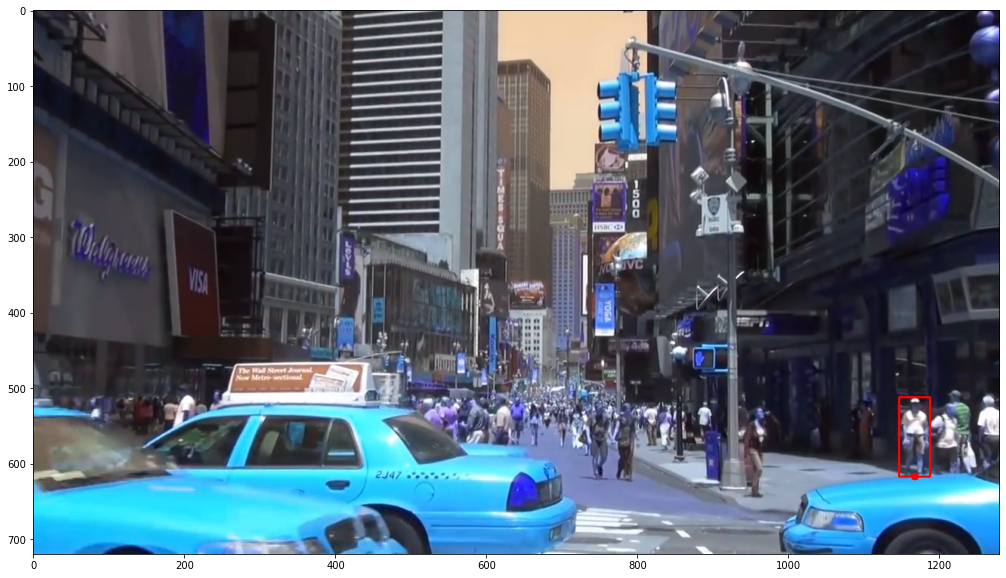

In [ ]:
#computing center 
x_center = int((x1+x2)/2)
y_center = int(y2)

center = (x_center, y_center)

_ = cv2.circle(img, center, 5, (255, 0, 0), -1)
plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
#function to return the bottom center of every box
def mid_point(img,person,idx):
  x1,y1,x2,y2 = person[idx]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)
  
  #computing bottom center of box
  x_mid = int((x1+x2)/2)
  y_mid = int(y2)
  mid   = (x_mid,y_mid)
  
  _ = cv2.circle(img, mid, 5, (0, 0, 255), -1)
  cv2.putText(img, str(idx), mid, cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2, cv2.LINE_AA)
  
  return mid

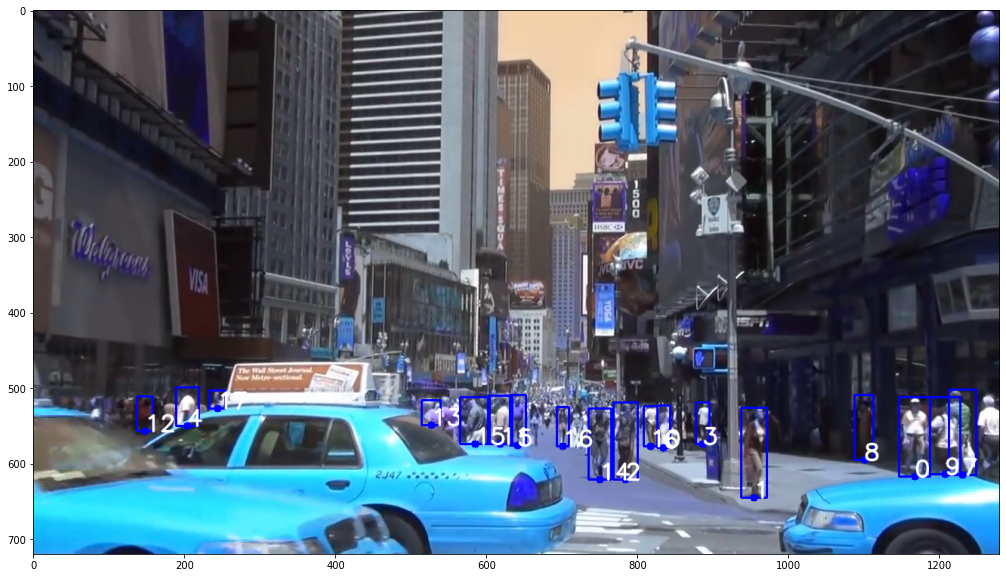

In [ ]:
midpoints = [mid_point(img,person,i) for i in range(len(person))]

plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
%%time
from scipy.spatial import distance
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 12.4 µs


In [ ]:
dist= compute_distance(midpoints,num)

In [ ]:
%%time
def find_closest(dist,num,thresh):
  p1=[]
  p2=[]
  d=[]
  for i in range(num):
    for j in range(i,num):
      if( (i!=j) & (dist[i][j]<=thresh)):
        p1.append(i)
        p2.append(j)
        d.append(dist[i][j])
  return p1,p2,d

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [ ]:
import pandas as pd

thresh=100
p1,p2,d=find_closest(dist,num,thresh)
df = pd.DataFrame({"p1":p1,"p2":p2,"dist":d})
df

p1  p2       dist
0    0   7  63.031738
1    0   8  70.519501
2    0   9  40.112342
3    1   3  98.310732
4    2   6  65.299311
5    2  10  55.000000
6    2  14  34.000000
7    2  16  93.941471
8    3   6  52.239832
9    3  10  69.065187
10   4  12  56.435804
11   4  17  46.141088
12   5  11  23.086793
13   5  15  56.035703
14   5  16  60.008333
15   6  10  17.117243
16   6  14  93.914855
17   7   9  23.021729
18  10  14  80.156098
19  11  13  94.371606
20  11  15  33.000000
21  11  16  83.054199
22  13  15  63.158531
23  14  16  65.855903

In [ ]:
def change_2_red(img,person,p1,p2):
  risky = np.unique(p1+p2)
  for i in risky:
    x1,y1,x2,y2 = person[i]
    _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)  
  return img

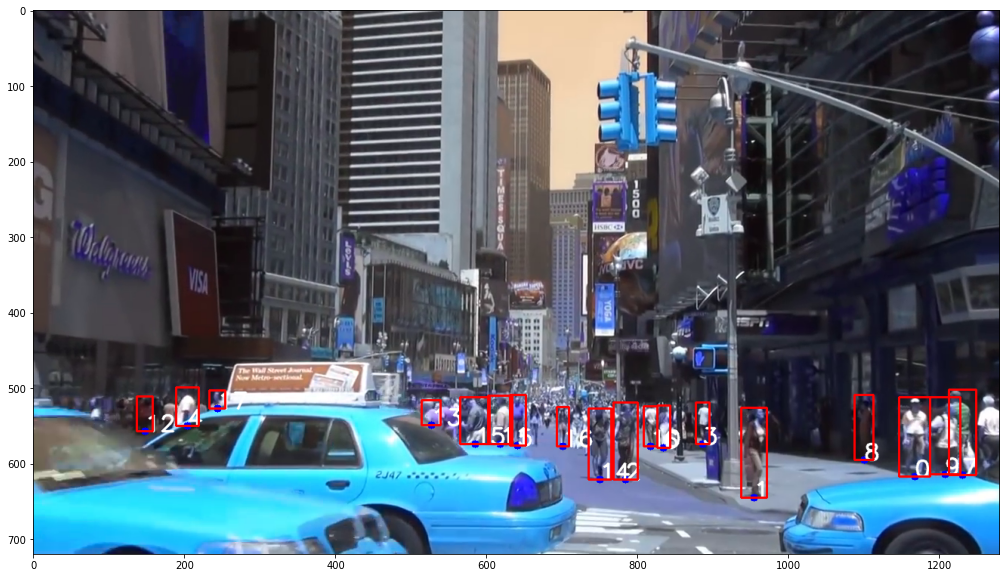

In [ ]:
img = change_2_red(img,person,p1,p2)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
import os
import re

names=os.listdir('frames/')
names.sort(key=lambda f: int(re.sub('\D', '', f)))

In [ ]:
def find_closest_people(name,thresh):

  img = cv2.imread('frames/'+name)
  outputs = predictor(img)
  classes=outputs['instances'].pred_classes.cpu().numpy()
  bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
  ind = np.where(classes==0)[0]
  person=bbox[ind]
  midpoints = [mid_point(img,person,i) for i in range(len(person))]
  num = len(midpoints)
  dist= compute_distance(midpoints,num)
  p1,p2,d=find_closest(dist,num,thresh)
  img = change_2_red(img,person,p1,p2)
  cv2.imwrite('frames/'+name,img)
  return 0

In [ ]:
from tqdm import tqdm
thresh=100
_ = [find_closest_people(names[i],thresh) for i in tqdm(range(len(names))) ]

100%|██████████| 750/750 [05:55<00:00,  2.11it/s]


In [ ]:
%%time
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):
    
    #reading each frames after conversion
    img = cv2.imread('frames/'+frames[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    height, width, layers = img.shape
    size = (width,height)
    
    frame_array.append(img)

out = cv2.VideoWriter('output2.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 
for i in range(len(frame_array)):
    out.write(frame_array[i])
out.release()

CPU times: user 23 s, sys: 10.4 s, total: 33.4 s
Wall time: 32.4 s
